In [1]:
#loading librarys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Data Exploration and Preprocessing

In [2]:
# loading dataset
data = pd.read_csv('blogs.csv')
data

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


### EDA

In [3]:
data.shape

(2000, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [5]:
data.describe()

,Data,Labels
count,2000,2000
unique,2000,20
top,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,alt.atheism
freq,1,100


In [6]:
data.isna().sum()

Data      0
Labels    0
dtype: int64

In [7]:
data.duplicated().sum()

np.int64(0)

In [8]:
data['Labels'].value_counts()

Labels
alt.atheism                 100
comp.graphics               100
comp.os.ms-windows.misc     100
comp.sys.ibm.pc.hardware    100
comp.sys.mac.hardware       100
comp.windows.x              100
misc.forsale                100
rec.autos                   100
rec.motorcycles             100
rec.sport.baseball          100
rec.sport.hockey            100
sci.crypt                   100
sci.electronics             100
sci.med                     100
sci.space                   100
soc.religion.christian      100
talk.politics.guns          100
talk.politics.mideast       100
talk.politics.misc          100
talk.religion.misc          100
Name: count, dtype: int64

##### cleaning the text 

In [9]:
import re
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
def clean_text(text):
    text = re.sub(r'(^|\n)(From|Subject|Organization|path|Lines|Xref):.*','',text)
    text = re.sub(r'\S+@\S+','',text) #remove emails
    text = re.sub(r'http\S+\www\S+','',text) #remove urls
    text = re.sub(r'[^a-zA-Z\s]','',text) #remove non alphabet
    text = text.lower()
    text = re.sub(r'\s+,','',text).strip()
    return text



In [11]:
data['Data'] = data['Data'].apply(clean_text)
data

,Data,Labels
0,path cantaloupesrvcscmuedumagnesiumclubcccmued...,alt.atheism
1,newsgroups altatheism\npath cantaloupesrvcscmu...,alt.atheism
2,path cantaloupesrvcscmuedudasnewsharvardedunoc...,alt.atheism
3,path cantaloupesrvcscmuedumagnesiumclubcccmued...,alt.atheism
4,newsgroups altatheismtalkreligionmisctalkorigi...,alt.atheism
...,...,...
1995,path cantaloupesrvcscmuedumagnesiumclubcccmued...,talk.religion.misc
1996,newsgroups talkreligionmisctalkpoliticsmiscsci...,talk.religion.misc
1997,path cantaloupesrvcscmuedumagnesiumclubcccmued...,talk.religion.misc
1998,path cantaloupesrvcscmuedudasnewsharvardedunoc...,talk.religion.misc


##### feature extraction 

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
tfidf = TfidfVectorizer(max_features=5000)

In [14]:
X = tfidf.fit_transform(data['Data']).toarray()
y = data['Labels']

#### Naive Bayes Model for Text Classification

##### Split the data into training and test sets.

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1600, 5000), (400, 5000), (1600,), (400,))

##### Implement a Naive Bayes classifier 

In [18]:
from sklearn.naive_bayes import MultinomialNB

In [19]:
model = MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

##### model evaluation

In [20]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report

In [21]:
def evaluate_model(y_test,y_pred):
    ac = accuracy_score(y_test,y_pred)
    
    print(f'performance:')
    print(f'accuracy : {ac:.3f}')
    print('confusion matrix :')
    print(confusion_matrix(y_test,y_pred))
    print('classification report :')
    print(classification_report(y_test,y_pred,zero_division=1))

In [22]:
y_pred = model.predict(X_test)

In [23]:
evaluate_model(y_test,y_pred)

performance:
accuracy : 0.733
confusion matrix :
[[17  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0 13  1  0  0  0  0  0  0  0  1  0  3  0  0  0  0  0  0  0]
 [ 0  0 17  2  0  0  0  0  1  0  0  1  1  0  0  0  0  0  0  0]
 [ 0  0  1 14  0  0  0  1  0  0  0  2  7  0  0  0  0  0  0  0]
 [ 1  0  0  1 12  0  0  0  0  1  0  0  3  1  0  0  0  0  2  0]
 [ 0  4  0  1  0 18  0  0  0  0  0  0  1  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0 11  2  2  0  0  0  2  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0 16  1  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0 15  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 17  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  2  0  0  0  0  0  0  0 12  1  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1 16  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  1  2  0  0  1  0 13  0  0  0  3  0]
 [ 1  

#### Sentiment Analysis

In [25]:
!pip install textblob

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   --------------------------------- ------ 524.3/624.3 kB 1.9 MB/s eta 0:00:01
   ---------------------------------------- 624.3/624.3 kB 1.8 MB/s eta 0:00:00


In [26]:
# using TextBlob because simple and effective for polarity based sentiment analysis
from textblob import TextBlob

In [27]:
def get_sentiment(text):
    polarity = TextBlob(str(text)).sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity == 0:
        return 'Netural'
    else:
        return 'Negative'

In [28]:
# applying to the data columns
data['Sentiment'] = data['Data'].apply(get_sentiment)
data

,Data,Labels,Sentiment
0,path cantaloupesrvcscmuedumagnesiumclubcccmued...,alt.atheism,Positive
1,newsgroups altatheism\npath cantaloupesrvcscmu...,alt.atheism,Negative
2,path cantaloupesrvcscmuedudasnewsharvardedunoc...,alt.atheism,Positive
3,path cantaloupesrvcscmuedumagnesiumclubcccmued...,alt.atheism,Positive
4,newsgroups altatheismtalkreligionmisctalkorigi...,alt.atheism,Positive
...,...,...,...
1995,path cantaloupesrvcscmuedumagnesiumclubcccmued...,talk.religion.misc,Positive
1996,newsgroups talkreligionmisctalkpoliticsmiscsci...,talk.religion.misc,Positive
1997,path cantaloupesrvcscmuedumagnesiumclubcccmued...,talk.religion.misc,Positive
1998,path cantaloupesrvcscmuedudasnewsharvardedunoc...,talk.religion.misc,Positive


##### distribution of sentiments 

In [29]:
#count of each sentiment
sentiment_counts = data['Sentiment'].value_counts()
sentiment_counts

Sentiment
Positive    1566
Negative     372
Netural       62
Name: count, dtype: int64

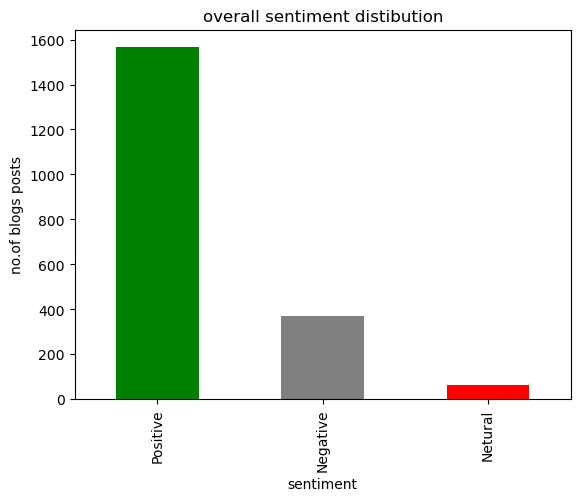

In [30]:
sentiment_counts.plot(kind='bar',color=['green','gray','red'])
plt.title('overall sentiment distibution')
plt.xlabel('sentiment')
plt.ylabel('no.of blogs posts')
plt.show()

In [31]:
# cross tab between labels and sentiments
category_sentiment = pd.crosstab(data['Labels'],data['Sentiment'])
category_sentiment

Sentiment,Negative,Netural,Positive
Labels,,,
alt.atheism,27,2,71
comp.graphics,15,5,80
comp.os.ms-windows.misc,14,7,79
comp.sys.ibm.pc.hardware,13,2,85
comp.sys.mac.hardware,14,5,81
comp.windows.x,14,3,83
misc.forsale,10,6,84
rec.autos,15,6,79
rec.motorcycles,22,2,76


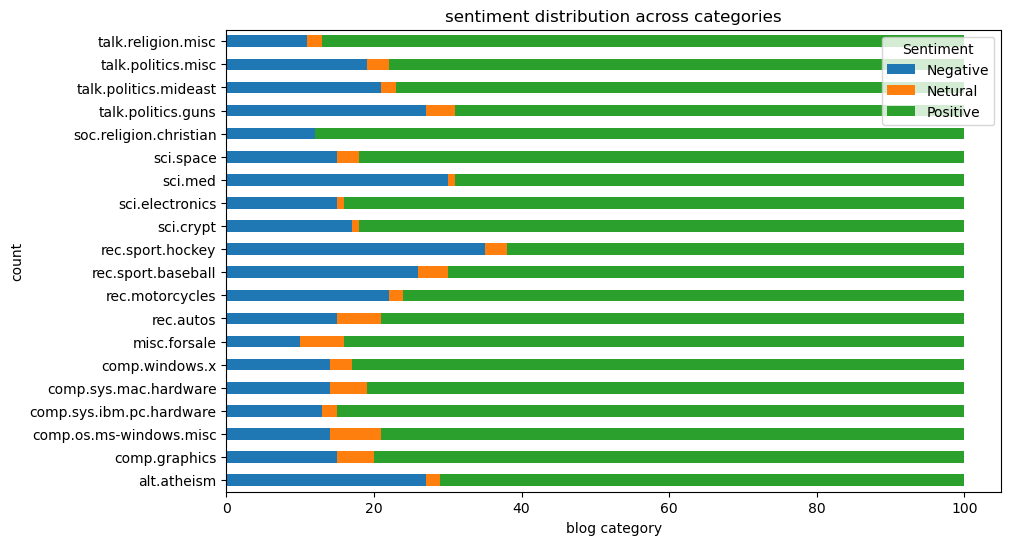

In [32]:
category_sentiment.plot(kind='barh',stacked=True,figsize=(10,6))
plt.title('sentiment distribution across categories')
plt.xlabel('blog category')
plt.ylabel('count')
plt.legend(title='Sentiment')
plt.show()

#### Evaluation

In [33]:
ac = accuracy_score(y_test,y_pred)
ps = precision_score(y_test,y_pred,average='weighted',zero_division=1)
rs = recall_score(y_test,y_pred,average='weighted')
f1 = f1_score(y_test,y_pred,average='weighted')
print(f'performance:')
print(f'accuracy : {ac:.3f}')
print(f'precision : {ps:.3f}')
print(f'recall : {rs:.3f}')
print(f'f1-score : {f1:.3f}')
print('classification report :')
print(classification_report(y_test,y_pred,zero_division=1))            

performance:
accuracy : 0.733
precision : 0.803
recall : 0.733
f1-score : 0.732
classification report :
                          precision    recall  f1-score   support

             alt.atheism       0.45      0.94      0.61        18
           comp.graphics       0.76      0.72      0.74        18
 comp.os.ms-windows.misc       0.89      0.77      0.83        22
comp.sys.ibm.pc.hardware       0.78      0.56      0.65        25
   comp.sys.mac.hardware       0.80      0.57      0.67        21
          comp.windows.x       1.00      0.72      0.84        25
            misc.forsale       1.00      0.61      0.76        18
               rec.autos       0.84      0.89      0.86        18
         rec.motorcycles       0.75      0.94      0.83        16
      rec.sport.baseball       0.81      0.94      0.87        18
        rec.sport.hockey       0.88      1.00      0.94        15
               sci.crypt       0.77      0.89      0.83        19
         sci.electronics       0.38  

###### the navive bayes classifier performed well an accuracy of 73.3%,precision of 80.3%,recall of 73.3% and an f1-score of 73.2%.
###### this shows the model is effectively classifying most categories with good balance between precision and recall.

##### observations:
###### categories like rec.sport.hockey, sci.med and soc.religion.christian achieved high accuracy.
###### some overlap occurred in similar or small classes (eg., talk.religio.misc and sci.electronics).
###### overall performance indicates the TF-IDF _ navive bayes combination works well for text categorization.

##### Sentiment analysis reflection:
###### most  blog posts were neutral, with positive sentiments in technical or hobby-related topics and more negative sentiments in political or religious dicussions.
###### this suggests differences in tone and emotinal expression across catrgories 